# Customer Segmentation Analysis

## Downloading and Loading the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 3.Performing Visualizations

### (i) Univariate Analysis


### Histplot

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

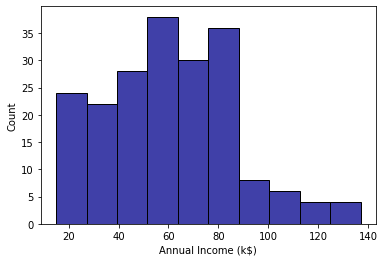

In [4]:
sns.histplot(data['Annual Income (k$)'], color="darkblue")


### Box Plot

<AxesSubplot:xlabel='Annual Income (k$)'>

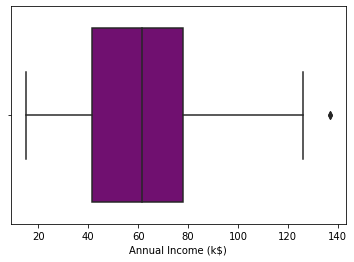

In [8]:
sns.boxplot(data['Annual Income (k$)'], color="purple")

### Dist Plot

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

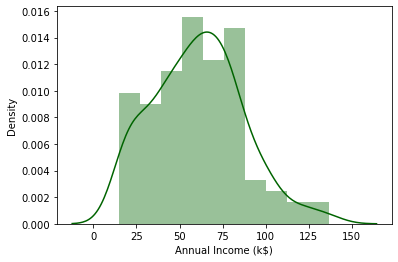

In [9]:
sns.distplot(data['Annual Income (k$)'], color="darkgreen")

### (ii) Bi-variate Analysis

### Barplot

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

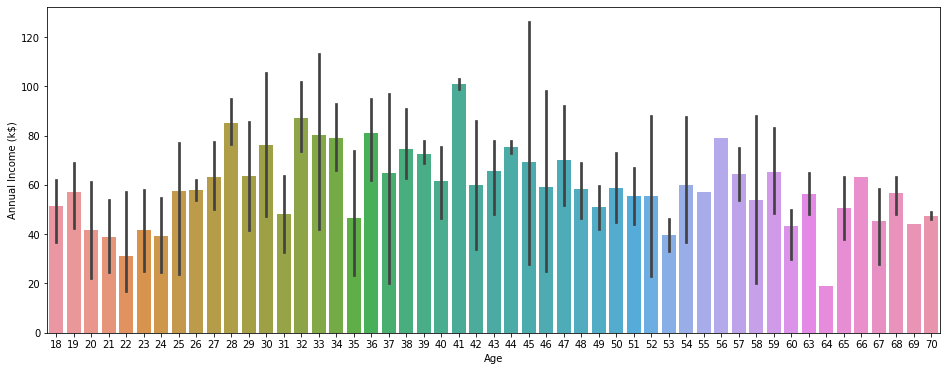

In [10]:
plt.figure(figsize=(16,6))
sns.barplot(data['Age'],data['Annual Income (k$)'])

### Lineplot

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

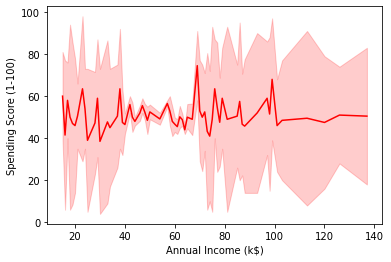

In [11]:
sns.lineplot(data['Annual Income (k$)'], data['Spending Score (1-100)'], color="red")

### (iii) Multi-variate Analysis

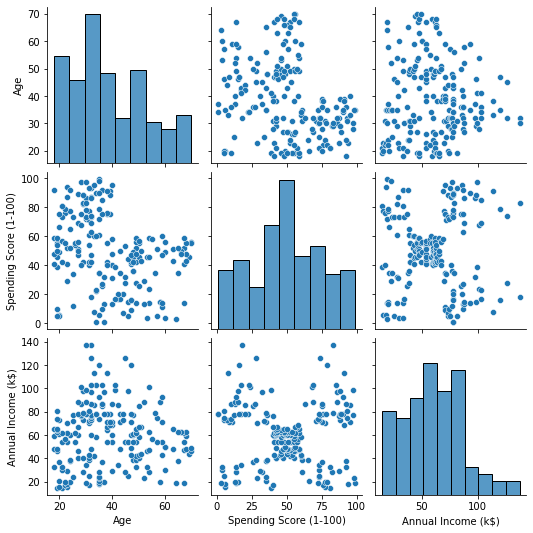

In [16]:
sns.pairplot(data=data[["Age", "Gender","Spending Score (1-100)","Annual Income (k$)"]])

### Correlation between the different attributes

<AxesSubplot:>

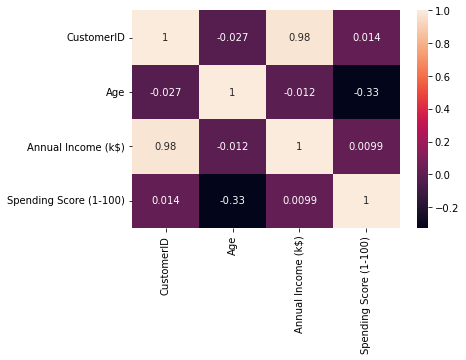

In [17]:
sns.heatmap(data.corr(),annot=True)

## 4.Performing Descriptive Statistics on the Dataset

In [18]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [19]:
data.info
data.shape

(200, 5)

## 5.Check for Missing values

In [21]:

data.isnull().any() #Inference: The dataset has no null values

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [22]:
data.drop('CustomerID',axis=1,inplace=True)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## 6.Finding the outliers and replacing them

In [23]:
for i in data:
    if data[i].dtype=='int64':
        q1=data[i].quantile(0.25)
        q3=data[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        data[i]=np.where(data[i] >upper, upper, data[i])
        data[i]=np.where(data[i] <lower, lower, data[i])

### After removing outliers, boxplot will be like

{'whiskers': [<matplotlib.lines.Line2D at 0x298de535e20>,
 'caps': [<matplotlib.lines.Line2D at 0x298de545400>,
 'boxes': [<matplotlib.lines.Line2D at 0x298de535b50>],
 'medians': [<matplotlib.lines.Line2D at 0x298de545940>],
 'fliers': [<matplotlib.lines.Line2D at 0x298de545c70>],
 'means': []}

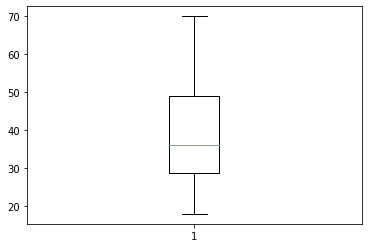

In [24]:
plt.boxplot(data['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x298de59d9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x298de59dee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x298de5904f0>],
 'medians': [<matplotlib.lines.Line2D at 0x298de5ac4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x298de5ac790>],
 'means': []}

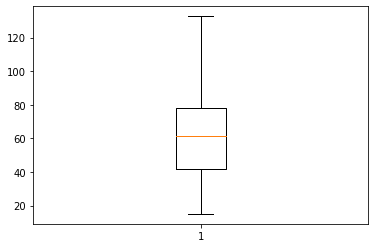

In [25]:
plt.boxplot(data['Annual Income (k$)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x298de6034c0>,
 'caps': [<matplotlib.lines.Line2D at 0x298de603a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x298de6031f0>],
 'medians': [<matplotlib.lines.Line2D at 0x298de60f040>],
 'fliers': [<matplotlib.lines.Line2D at 0x298de60f310>],
 'means': []}

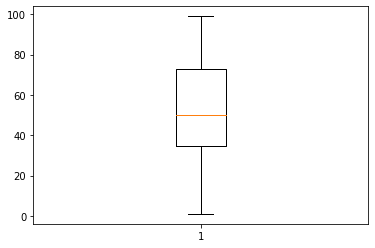

In [26]:
plt.boxplot(data['Spending Score (1-100)'])

## 7.Checking for categorical columns and performing encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
l_en = LabelEncoder()
data['Gender'] = l_en.fit_transform(data['Gender'])
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19.0,15.0,39.0
1,1,21.0,15.0,81.0
2,0,20.0,16.0,6.0
3,0,23.0,16.0,77.0
4,0,31.0,17.0,40.0


## 8.Scaling the data

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled[0:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00849257, 0.05102041],
       [0.        , 0.09615385, 0.00849257, 0.7755102 ],
       [0.        , 0.25      , 0.01698514, 0.39795918]])

## 9.Performing any of the clustering algorithms

In [30]:
from sklearn.cluster import KMeans
km = KMeans()
res = km.fit_predict(data_scaled)
res

array([4, 4, 1, 1, 1, 1, 5, 1, 0, 1, 0, 1, 5, 1, 4, 4, 1, 4, 0, 1, 4, 4,
       5, 4, 5, 4, 5, 4, 5, 1, 0, 1, 0, 4, 5, 1, 5, 1, 5, 1, 5, 4, 0, 1,
       5, 1, 5, 1, 1, 1, 5, 4, 1, 0, 5, 0, 5, 0, 1, 0, 0, 4, 5, 5, 0, 4,
       5, 5, 4, 1, 0, 5, 5, 5, 0, 4, 5, 4, 1, 5, 0, 4, 0, 5, 1, 0, 5, 1,
       1, 5, 5, 4, 0, 5, 1, 4, 5, 1, 0, 4, 1, 5, 0, 4, 0, 1, 5, 0, 0, 0,
       0, 1, 5, 4, 1, 1, 5, 5, 5, 5, 4, 5, 5, 2, 1, 6, 3, 2, 0, 2, 3, 2,
       1, 6, 3, 6, 7, 2, 3, 6, 7, 2, 1, 6, 3, 2, 3, 6, 7, 2, 3, 2, 7, 6,
       7, 6, 3, 6, 3, 6, 5, 6, 3, 6, 3, 6, 3, 6, 7, 2, 3, 2, 3, 2, 7, 6,
       3, 2, 3, 2, 7, 6, 3, 6, 7, 2, 7, 2, 7, 6, 7, 6, 3, 6, 7, 6, 7, 2,
       3, 2])

In [31]:
data1 = pd.DataFrame(data_scaled, columns = data.columns)
data1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


In [32]:
data1['kclus']  = pd.Series(res)
data1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),kclus
0,1.0,0.019231,0.000000,0.387755,4
1,1.0,0.057692,0.000000,0.816327,4
2,0.0,0.038462,0.008493,0.051020,1
3,0.0,0.096154,0.008493,0.775510,1
4,0.0,0.250000,0.016985,0.397959,1


In [33]:
data1['kclus'].unique()

array([4, 1, 5, 0, 2, 6, 3, 7])

In [34]:
data1['kclus'].value_counts()

5    40
1    37
0    26
4    25
6    21
3    19
2    18
7    14
Name: kclus, dtype: int64

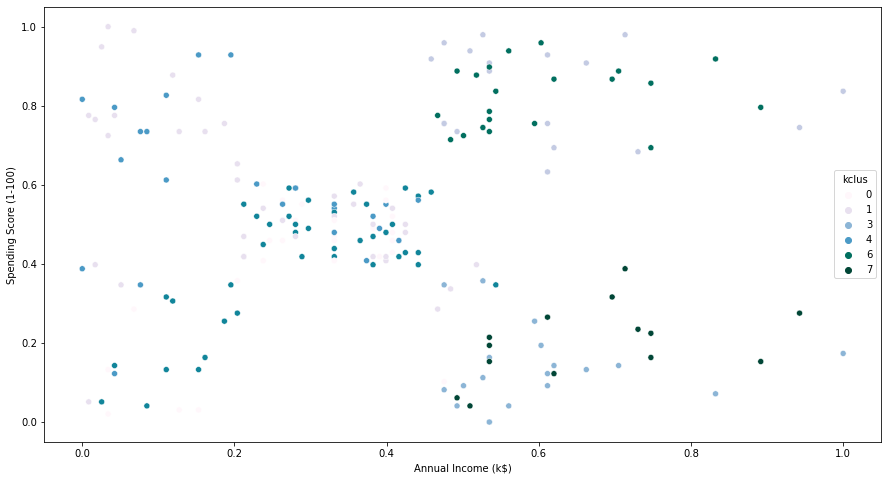

In [35]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x=data1['Annual Income (k$)'],
                y=data1['Spending Score (1-100)'],
                hue=data1['kclus'],
                palette='PuBuGn')
plt.show()


In [36]:
ind = data1.iloc[:,0:4]
ind.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


In [37]:
dep = data1.iloc[:,4:]
dep.head()

,kclus
0,4
1,4
2,1
3,1
4,1


## Splitting dataset into train and test data

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ind,dep,test_size=0.3,random_state=1)
x_train.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
116,0.0,0.865385,0.424628,0.428571
67,0.0,0.961538,0.280255,0.479592
78,0.0,0.096154,0.331210,0.520408
42,1.0,0.576923,0.203822,0.357143
17,1.0,0.038462,0.050955,0.663265


In [41]:
x_test.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
58,0.0,0.173077,0.263270,0.510204
40,0.0,0.903846,0.195329,0.346939
34,0.0,0.596154,0.152866,0.132653
102,1.0,0.942308,0.399151,0.591837
184,0.0,0.442308,0.713376,0.387755


In [42]:
y_train.head()

,kclus
116,5
67,5
78,1
42,0
17,4


In [43]:
y_test.head()

,kclus
58,1
40,5
34,5
102,0
184,7


In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [45]:
pred_test = lr.predict(x_test)
pred_test[0:5]

array([[3.95042116],
       [3.52672483],
       [3.51129248],
       [2.16561932],
       [5.40782042]])

## Measuring the performance using metrics

In [46]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
mse = mean_squared_error(pred_test,y_test)
print("The Mean squared error is: ", mse)



The Mean squared error is:  3.785711485954305


In [47]:

rmse = np.sqrt(mse)
print("The Root mean squared error is: ", rmse)


The Root mean squared error is:  1.945690490790944


In [48]:

mae = mean_absolute_error(pred_test,y_test)
print("The Mean absolute error is: ", mae)


The Mean absolute error is:  1.7183473427088407


In [49]:

acc = lr.score(x_test,y_test)
print("The accuracy is: ", acc)

The accuracy is:  0.2718229670102855
